# Springs
> Helped out some students today that were implementing a system of springs and masses, can I implement something similar?

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [simulation, mechanics]
- image: https://www.fridman.com/74576_wp-uploads/2019/03/Compression-springs.jpg
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [1]:
#hide
import warnings
warnings.filterwarnings("ignore")

In [2]:
#collapse
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
from ipywidgets import interactive

In [3]:
N=3
xs0 = np.linspace(0,1,N)
ys0 = np.zeros(N)
k=1.0  # spring coefficient
m=1.0  # masses

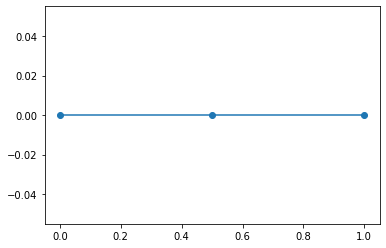

In [4]:
fig,ax=plt.subplots()
ax.plot(xs0,ys0,'o-');

In [5]:
dxs0 = np.diff(xs0)
dys0 = np.diff(ys0)
ls0 = np.sqrt(dxs0**2+dys0**2)

In [6]:
def calculate_spring_forces(xs,ys):
    dxs = np.diff(xs)
    dys = np.diff(ys)
    fxs = k*(dxs-dxs0)
    fys = k*(dys-dys0)
    return fxs,fys


In [8]:
calculate_spring_forces(xs=xs0, ys=ys0)

(array([0., 0.]), array([0., 0.]))

In [9]:
def f(x0=0.0,y0=0.0,x1=0.5,y1=0.0,x2=1.0,y2=0.0):
    
    fig,ax=plt.subplots()
    xs = [x0,x1,x2]
    ys = [y0,y1,y2]
    ax.plot(xs,ys,'o-');
    ax.set_xlim(-0.5,1.5)
    ax.set_ylim(-1,1)
    plt.show()

    
interactive_plot = interactive(f, x0=(0.0,1.0), x1=(0.0,1), x2=(0.0,1.0), y0=(0.0,1.0), y1=(0.0,1.0), y2=(0.0,1.0))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='x0', max=1.0), FloatSlider(value=0.0, description='y…

In [11]:
xs_=np.array(xs0)
xs_[0]-=1.0
fxs,fys = calculate_spring_forces(xs=xs_, ys=ys0)

In [12]:
fxs

array([1., 0.])

In [13]:
fys

array([0., 0.])

In [14]:
np.roll(fxs,1)

array([0., 1.])

In [15]:
np.roll(fxs,2)

array([1., 0.])

In [16]:
fxs_ = np.concatenate([[0],fxs,[0]])
fxs_

array([0., 1., 0., 0.])

In [17]:
fys_ = np.concatenate([[0],fys,[0]])
fys_

array([0., 0., 0., 0.])

In [18]:
fx_left = fxs_[0:-1]
fx_left


array([0., 1., 0.])

In [19]:
fx_right = fxs_[1:]
fx_right

array([1., 0., 0.])

In [20]:
def spring_force_to_point(fs):
    
    fs_ = np.concatenate([[0],fs,[0]])
    f_1 = fs_[0:-1]
    f_2 = fs_[1:]
    return f_1, f_2

def calculate_point_forces(fxs,fys):
    
    fx_left, fx_right = spring_force_to_point(fxs)
    fy_bottom, fy_top = spring_force_to_point(fys)
    
    fx = -fx_left + fx_right
    fy = -fy_bottom + fy_top
    
    return fx,fy
    

In [21]:
calculate_point_forces(fxs,fys)

(array([ 1., -1.,  0.]), array([0., 0., 0.]))

In [22]:
def f(x0=0.0,y0=0.0,x1=0.5,y1=0.0,x2=1.0,y2=0.0):
    
    fig,ax=plt.subplots()
    xs = [x0,x1,x2]
    ys = [y0,y1,y2]
    
    fxs,fys = calculate_spring_forces(xs=xs, ys=ys)
    
    fx,fy = calculate_point_forces(fxs=fxs, fys=fys)
    
    for x,y,fx_,fy_ in zip(xs,ys,fx,fy):
        ax.arrow(x,y,fx_,fy_, head_width=0.05, head_length=0.1,)
    
    ax.plot(xs,ys,'o-');
    
    ax.set_xlim(-0.5,1.5)
    ax.set_ylim(-1,1)
    plt.show()
    ax.set_title('Point forces')

    
interactive_plot = interactive(f, x0=(0.0,1.0), x1=(0.0,1), x2=(0.0,1.0), y0=(0.0,1.0), y1=(0.0,1.0), y2=(0.0,1.0))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='x0', max=1.0), FloatSlider(value=0.0, description='y…

In [23]:
def update(t, states):
    
    xs = states[0:N]
    ys = states[N:2*N]
    
    dxs = states[2*N:3*N]
    dys = states[3*N:]
    
    
    fxs,fys = calculate_spring_forces(xs=xs, ys=ys)
    fx,fy = calculate_point_forces(fxs=fxs, fys=fys)
    
    ddxs = fx/m
    ddys = fy/m
    
    dstates = np.concatenate([dxs,dys,ddxs,ddys])
    
    return dstates
    
    

In [25]:
dxs=[0,0,0]
dys=[0,0,0]
states = np.concatenate([xs0,ys0,dxs,dys])
update(0, states = states)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
states_0 = np.concatenate([xs_,ys0,dxs,dys])
t = np.linspace(0,10,100)
result = solve_ivp(fun = update,t_span=[t[0],t[-1]],t_eval=t, y0 = states_0)

In [30]:
result

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 134
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.656565

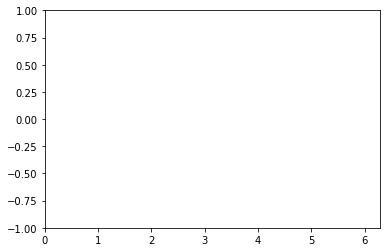

In [31]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(-0.5,1.5)
    ax.set_ylim(-1,1)
    return ln,

def update(frame):
    
    xs = result[0:N]
    ys = result[N:2*N]
    
    xdata.append(frame)
    ydata.append(np.sin(frame))
    
    ln.set_data(xdata, ydata)
    return ln,

anim = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
anim

In [35]:
plt.rcParams["animation.html"] = "jshtml"
HTML(anim.to_jshtml())